In [14]:
#install.packages("ISLR")

library("ISLR")

In [15]:
#install.packages("MASS")

library("MASS")

In [16]:
data()

Data sets in package 'datasets':

AirPassengers           Monthly Airline Passenger Numbers 1949-1960
BJsales                 Sales Data with Leading Indicator
BJsales.lead (BJsales)
                        Sales Data with Leading Indicator
BOD                     Biochemical Oxygen Demand
CO2                     Carbon Dioxide Uptake in Grass Plants
ChickWeight             Weight versus age of chicks on different diets
DNase                   Elisa assay of DNase
EuStockMarkets          Daily Closing Prices of Major European Stock
                        Indices, 1991-1998
Formaldehyde            Determination of Formaldehyde
HairEyeColor            Hair and Eye Color of Statistics Students
Harman23.cor            Harman Example 2.3
Harman74.cor            Harman Example 7.4
Indometh                Pharmacokinetics of Indomethacin
InsectSprays            Effectiveness of Insect Sprays
JohnsonJohnson          Quarterly Earnings per Johnson & Johnson Share
LakeHuron               Level 

In [17]:
data("Carseats")

In [18]:
dataset=data("Carseats")

In [26]:
dataset=Carseats

In [27]:
?Carseats

Carseats                 package:ISLR                  R Documentation

_S_a_l_e_s _o_f _C_h_i_l_d _C_a_r _S_e_a_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     A simulated data set containing sales of child car seats at 400
     different stores.

_U_s_a_g_e:

     Carseats
     
_F_o_r_m_a_t:

     A data frame with 400 observations on the following 11 variables.

     'Sales' Unit sales (in thousands) at each location

     'CompPrice' Price charged by competitor at each location

     'Income' Community income level (in thousands of dollars)

     'Advertising' Local advertising budget for company at each
          location (in thousands of dollars)

     'Population' Population size in region (in thousands)

     'Price' Price company charges for car seats at each site

     'ShelveLoc' A factor with levels 'Bad', 'Good' and 'Medium'
          indicating the quality of the shelving location for the car
          seats at each site

     'Age' Average a

In [28]:
# install.packages("caTools")

library("caTools")

In [29]:
str(dataset)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [30]:
split=sample.split(dataset$Sales,SplitRatio = 0.75)

In [31]:
training_set=subset(dataset,split==TRUE)

In [32]:
testing_set=subset(dataset,split==FALSE)

# Regression Model

In [33]:
#install.packages("rpart")
library("rpart")

Installing package into 'C:/Users/haric/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\haric\AppData\Local\R\win-library\4.3\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\haric\AppData\Local\R\win-library\4.3\rpart\libs\x64\rpart.dll: Permission denied"
Warning message:
"restored 'rpart'"



The downloaded binary packages are in
	C:\Users\haric\AppData\Local\Temp\Rtmp0oVzli\downloaded_packages


In [34]:
regressor=rpart(Sales~.,data = training_set)

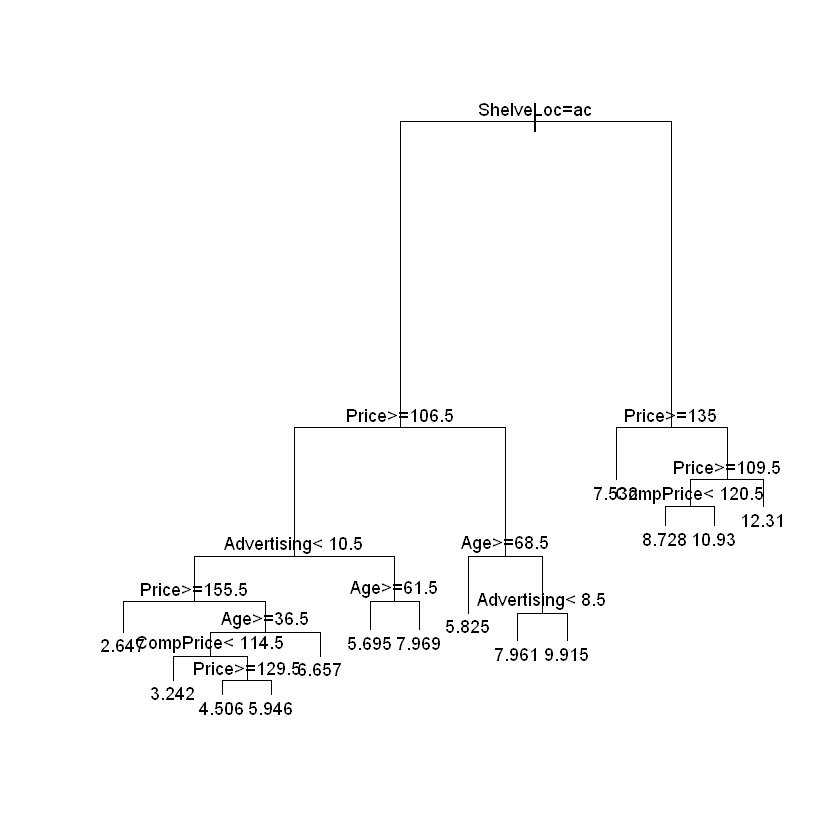

In [39]:
plot(regressor)
text(regressor,cex = 0.9)

# prediction

In [40]:
y_pred=predict(regressor,newdata = testing_set)

In [42]:
head(y_pred)

6         9        12        14        16        23 
 5.825294  5.946136 12.310556 12.310556  4.505909  4.505909

In [45]:
#MSE

mean((testing_set$Sales-y_pred)^2)

[1] 5.390212

In [46]:
#RMSE
sqrt(mean((testing_set$Sales-y_pred)^2))

[1] 2.321683

In [47]:
summary(testing_set$Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.070   5.830   7.685   7.712   9.095  15.630 

In [48]:
#install.packages('Metrics')
library("Metrics")

Installing package into 'C:/Users/haric/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\haric\AppData\Local\Temp\Rtmp0oVzli\downloaded_packages


In [49]:
rmse(testing_set$Sales,y_pred)

[1] 2.321683

# plot 

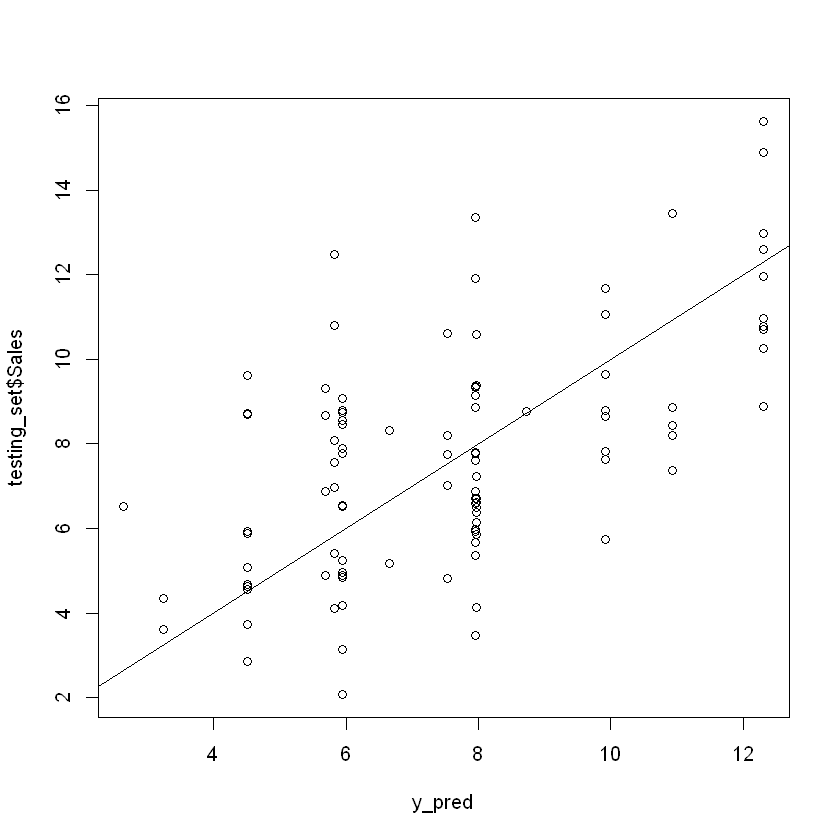

In [52]:
plot(y_pred,testing_set$Sales)
abline(0,1)

In [54]:
#tree package

#install.packages("tree")

library("tree")

In [55]:
treeregressor=tree(Sales~.,data=training_set)

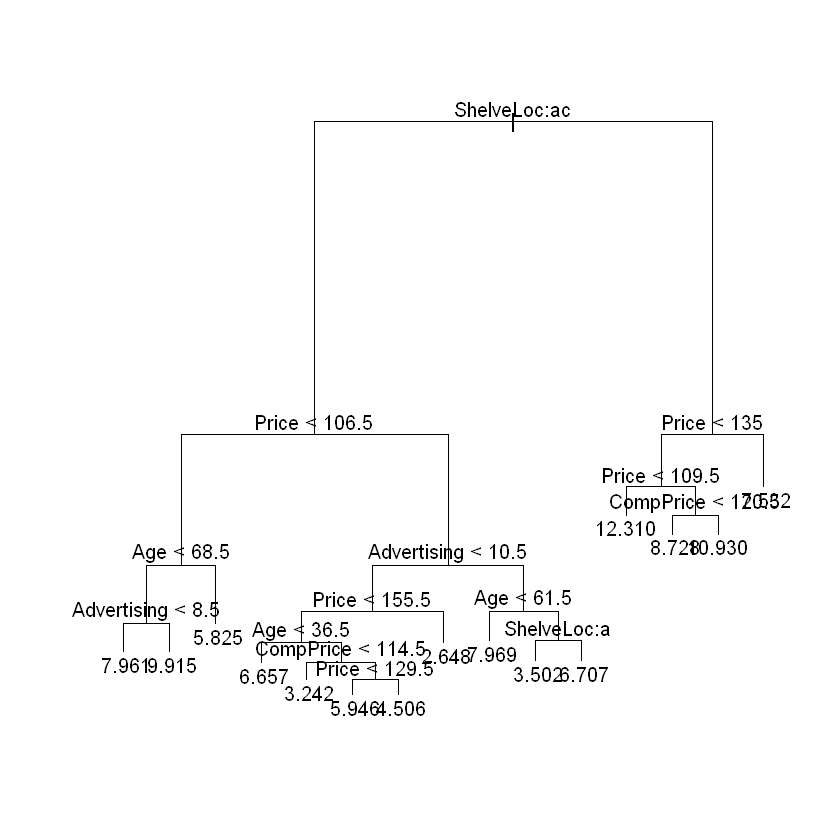

In [56]:
plot(treeregressor)
text(treeregressor)

In [57]:
Y_preditiontree=predict(treeregressor,newdata = testing_set)

In [58]:
head(Y_preditiontree)

6         9        12        14        16        23 
 5.825294  5.946136 12.310556 12.310556  4.505909  4.505909

In [59]:
rmse(testing_set$Sales,Y_preditiontree)

[1] 2.299972

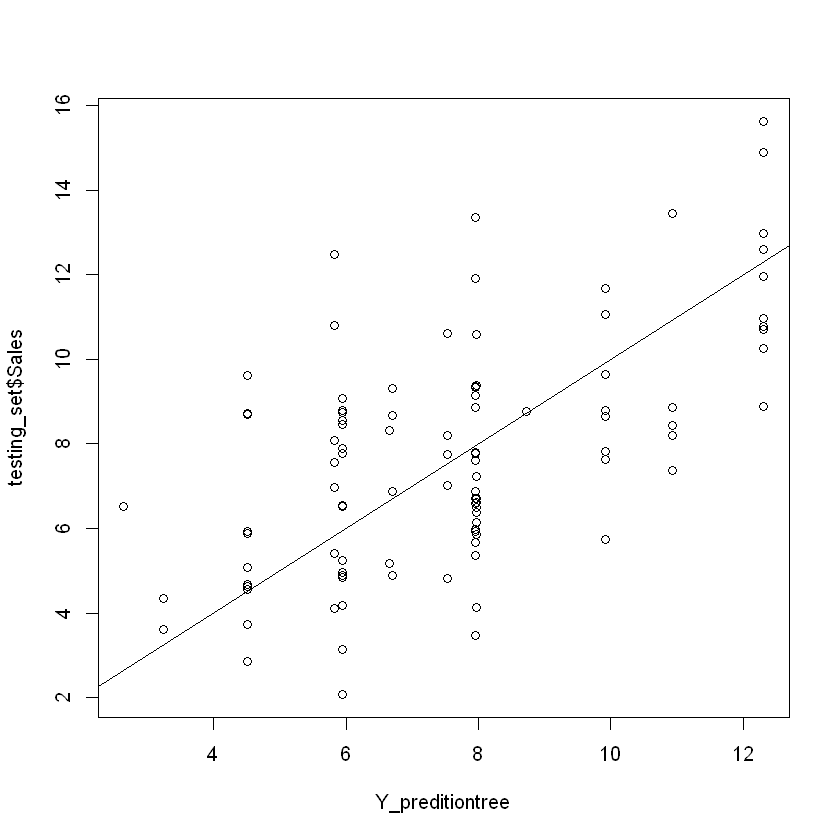

In [60]:
plot(Y_preditiontree,testing_set$Sales)
abline(0,1)